# Linked Structures

## Agenda

1. Motives
2. Objectives
3. Mechanisms

## 1. Motives

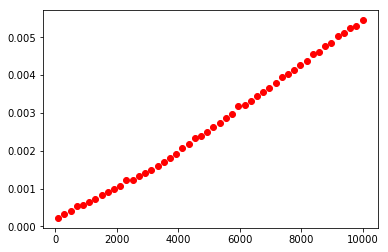

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

def time_array_front_insert_delete(n):
    return timeit('lst.insert(0, None) ; del lst[0]',
                  'lst = list(range({}))'.format(n),
                  number=1000)

ns = np.linspace(100, 10000, 50)
plt.plot(ns, [time_array_front_insert_delete(int(n)) for n in ns], 'ro')
plt.show()

In [6]:
# consider:

def concatenate(arr1, arr2):
    """Concatenates the contents of arr1 and arr2 as efficiently (time-wise)
    as possible, so that the resulting structure can be used to index all
    combined elements (arr1's followed by arr2's)."""

    # option 1:
    for x in arr2:
        arr1.append(x)
    return arr1

    # option 2:
    arr1.extend(arr2)
    return arr1

    # option 3:
    return arr1 + arr2

 2. Objectives

We need a new data storage mechanism for constructing data structures that:

- does not require monolithic, contiguous memory allocation,
- allows individual elements to be flexibly and efficiently reorganized,
- and preserves the ability to locate (e.g., via position) and iterate over elements

## 3. Mechanisms

### 3.1. Two-Element Lists

In [7]:
# data items
i1 = 'lions'
i2 = 'tigers'
i3 = 'bears'
i4 = 'oh, my'

In [8]:
[i1,i2,i3,i4]

['lions', 'tigers', 'bears', 'oh, my']

In [9]:
# creating individual "links"
I1 = [i1, None]
I2 = [i2, None]
I3 = [i3, None]
I4 = [i4, None]

In [10]:
I1[0]

'lions'

In [11]:
I1[1] = I2
I2[1] = I3
I3[1] = I4

In [12]:
head = I1

In [13]:
head[1][1][1][0]

'oh, my'

In [14]:
# link-ing them together

In [15]:
# iteration

In [16]:
def list_iter(head):
    yield head[0]
    yield head[1][0]
    yield head[1][1][0]
    yield head[1][1][1][0]

In [17]:
for x in list_iter(head):
    print(x)

lions
tigers
bears
oh, my


In [18]:
def list_iter(head):
    node = head
    while node:
        yield node[0]
        node = node[1]
        

In [19]:
for x in list_iter(head):
    print(x)

lions
tigers
bears
oh, my


In [20]:
# prepending

In [21]:
I0 = ['walruses' , None]

In [22]:
I0[1] = head
head = I0

In [23]:
head = ['elephants', head]

In [24]:
# insertion

In [25]:
I0 = ['polar bear', head[1]]
head[1] = I0

### 3.2. "Link" objects

In [26]:
class Link:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

In [27]:
# manually constructing a list

In [28]:
I1 = Link(i1)
I2 = Link(i2)
I3 = Link(i3)
I4 = Link(i4)

In [66]:
# iteration

In [31]:
def list_iter(head):
    node = head[0]
    while node:
        yield node.val
        node = node.next

In [32]:
for x in list_iter(head):
    print(x)

AttributeError: 'str' object has no attribute 'val'

In [ ]:
# iteration based on a recursive pattern

In [12]:
class LinkedList:
    
    def __init__(self):
        self.head = None
        
    def prepend(self, val):
        self.head = Link(val, self.head)
        
    def __iter__(self):
        cursor = self.head
        while cursor:
            yield cursor.val
            cursor = cursor.next
            
    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'

In [9]:
a=[1,2,4,5,96,7]

In [10]:
a=LinkedList()

In [11]:
for x in iter(a):
    print(x)

In [53]:
I1

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [82]:
class BinaryLink:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [83]:
t=  BinaryLink('hello',
              BinaryLink('hola'),
              BinaryLink('yo')),
    BinaryLink('hello there',
              BinaryLink('sawasdee'),
              BinaryLink('greetings'))

IndentationError: unexpected indent (<ipython-input-83-d5a753eafcab>, line 4)

In [ ]:
# manual construction of a "tree"

In [57]:
def tree_iter(root):
    if root:
        yield root.val
        yield from tree_iter(root.left)
        yield from tree_iter(root.right)

In [58]:
class NaryLink:
    def __init__(self, val, n=2):
        self.val = val
        self.children = [None] * n
        
    def __getitem__(self, idx):
        return self.children[idx]
    
    def __setitem__(self, idx, val):
        self.children[idx] = val
        
    def __iter__(self):
        for c in self.children:
            yield c

In [59]:
root = NaryLink('Kingdoms', n=5)

root[0] = NaryLink('Animalia', n=35)
root[1] = NaryLink('Plantae', n=12)
root[2] = NaryLink('Fungi', n=7)
root[3] = NaryLink('Protista', n=5)
root[4] = NaryLink('Monera', n=5)

root[2][0] = NaryLink('Chytridiomycota')
root[2][1] = NaryLink('Blastocladiomycota')
root[2][2] = NaryLink('Glomeromycota')
root[2][3] = NaryLink('Ascomycota')
root[2][4] = NaryLink('Basidiomycota')
root[2][5] = NaryLink('Microsporidia')
root[2][6] = NaryLink('Neocallimastigomycota')

def tree_iter(root):
    if root:
        yield root.val
        for c in root:
            yield from tree_iter(c)

In [60]:
for x in tree_iter(root):
    print(x)

Kingdoms
Animalia
Plantae
Fungi
Chytridiomycota
Blastocladiomycota
Glomeromycota
Ascomycota
Basidiomycota
Microsporidia
Neocallimastigomycota
Protista
Monera


In [84]:
class LinkedList:
    class Node:
        def __init__(self, val, prior=None, next=None):
            self.val = val
            self.prior = prior
            self.next  = next
    
    def __init__(self):
        self.head = LinkedList.Node(None) # *sentinel* node!
        self.head.prior = self.head.next = self.head
        self.count = 0
        
    def prepend(self, value):
        n = LinkedList.Node(value, prior=self.head, next=self.head.next)
        # important: Python carries out multiple assignments from *left to right*!
        self.head.next.prior = self.head.next = n
        self.count += 1
        
    def append(self, value):
        n = LinkedList.Node(value, prior=self.head.prior, next=self.head)
        n.prior.next = n.next.prior = n
        self.count += 1
        
    def del_head(self):
        assert(len(self) > 0)
        to_del = self.head.next
        # note: following is location agnostic!
        to_del.prior.next = to_del.next
        to_del.next.prior = to_del.prior
        self.count -= 1
        
    def __len__(self):
        return self.count
        
    def __iter__(self):
        n = self.head.next
        while n is not self.head:
            yield n.val
            n = n.next
    
    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'

In [85]:
lst = LinkedList()
for i in range(10):
    lst.prepend(i)
for i in range(10):
    lst.append(i)
lst.del_head()
lst

[8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]